In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

Suppose we want to draw random samples from the posterior distribution $\mathcal{N}(0,1)$ using slice sampling
<ol>
<li> start with some $z^{\tau}$
<li> sample $u$ uniformly from 0 to $f(z^{\tau})$
<li> create a slice $[z_{\min}, z_{\max}]$.
<li> sample $z^{\tau+1}$ uniformly in $[z_{\min}, z_{\max}]$.
</ol>
    
Ideally, we expect to have $f(x) \ge u$ $\forall x \in [z_{\min}, z_{\max}]$. So, a sample from $[z_{\min}, z_{\max}]$ increases the frequency of $z$ value with higher probability ($\ge u$).

We want to have an as large as possible interval $[z_{\min}, z_{\max}]$ (see adjustment of $[z_{\min}, z_{\max}]$ with $w$ in code) and $f(z^{\tau+1}) \ge u$ (see while True loop in code).

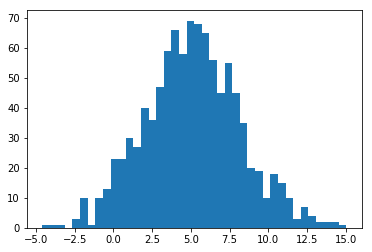

In [19]:
dist = stats.norm(5, 3)
w = 0.5
z = 0 #dist.rvs()

niters = 1000
samples = []
while len(samples) < niters:
    u = np.random.uniform(0, dist.pdf(z))
    zmin = z
    zmax = z
    while u < dist.pdf(zmin):
        zmin -= w
    while u < dist.pdf(zmax):
        zmax += w
    
    while True:
        z = np.random.uniform(zmin, zmax)
        if u > dist.pdf(z):
            if np.abs(z-zmin) < np.abs(z-zmax):
                zmin = z
            else:
                zmax = z
        else:
            samples.append(z)
            break
        
plt.hist(samples, 40)
plt.show()